In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [44]:
from Matplot.BoxPlot import BoxPlot


BoxPlot.box_plot(df.columns,df,by="output")

ModuleNotFoundError: No module named 'Matplot'

In [5]:
corr_matrix = df.corr()

Text(0, 0.5, 'Color bar')

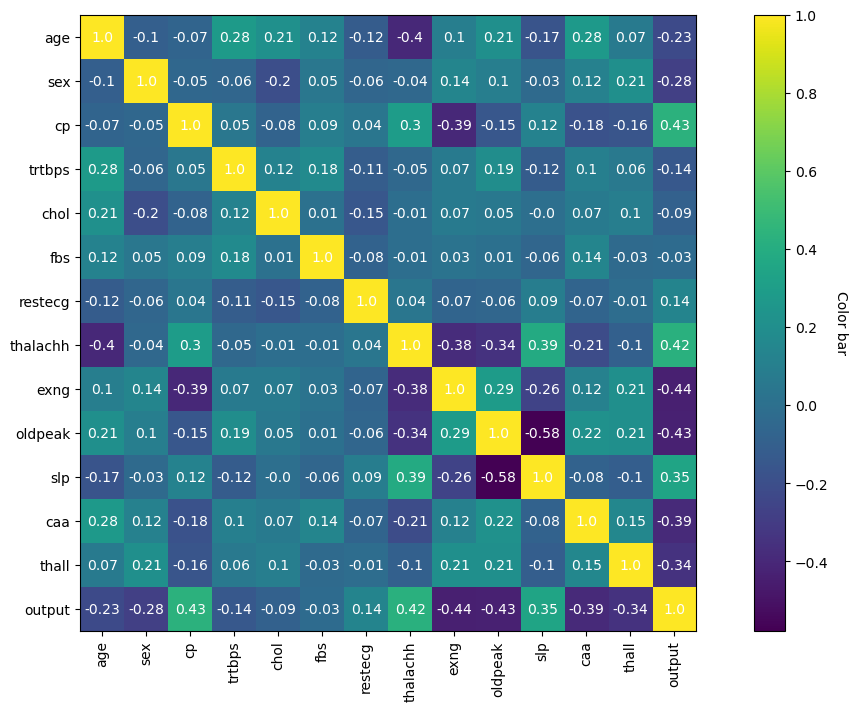

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Etiquetas
xlabs = corr_matrix.columns
ylabs = corr_matrix.index
         
# Mapa de calor
fig, ax = plt.subplots(figsize=(15,8))
im = ax.imshow(corr_matrix)

# Agregar las etiquetas
ax.set_xticks(np.arange(len(xlabs)), labels = xlabs)
ax.set_yticks(np.arange(len(ylabs)), labels = ylabs)

# Agregar los valores a cada celda
for i in range(len(xlabs)):
    for j in range(len(ylabs)):
        text = ax.text(j, i, round(corr_matrix.iloc[i, j], 2),
                       ha = "center", va = "center", color = "w")
        
# Agregar la leyenda
# cbar = fig.colorbar(im, ax=ax, label="corr")
# cbar.outline.set_visible(False)
cbar = ax.figure.colorbar(im, ax = ax)
ax.set_xticklabels(xlabs,rotation=90)
cbar.ax.set_ylabel("Color bar", rotation = -90, va = "bottom")

<Axes: >

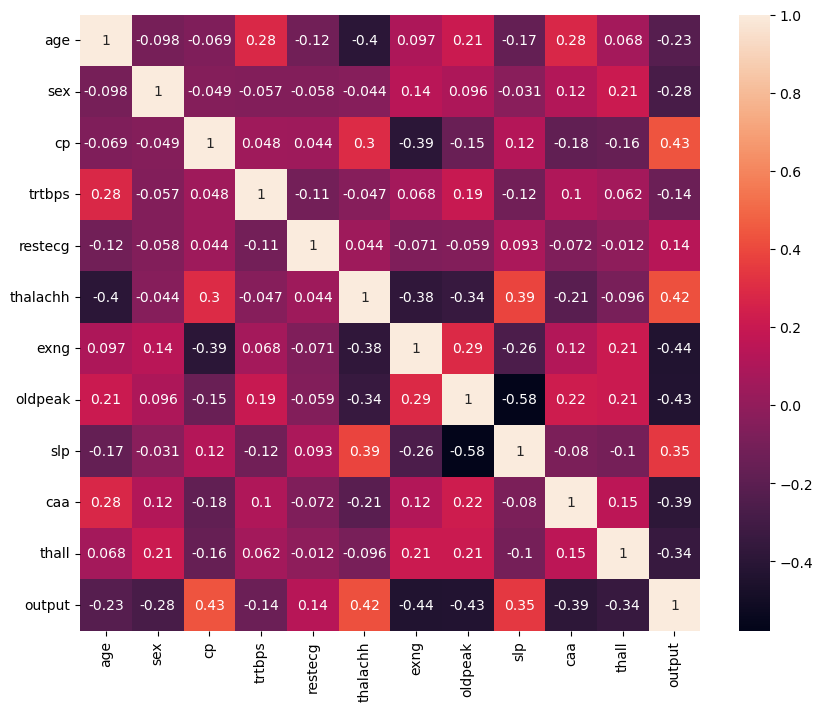

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [32]:
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

df = df.drop(["chol", "fbs"],axis=1)

y = df["output"].copy()

x_train, x_test, y_train, y_test = train_test_split(df.drop(["output"],axis=1), y, test_size=0.2)

In [33]:
from sklearn.discriminant_analysis import StandardScaler


x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

In [34]:

modelos = {
    "sgd_clf" : SGDClassifier(),
    "logistic_regression" : LogisticRegression(solver='lbfgs', max_iter=1000),
    "random_forest" : RandomForestClassifier(),
    "svc" : SVC(),
}


In [35]:
for clave, modelo in modelos.items():
    print(clave)
    modelo.fit(x_train,y_train)
    y_predict = modelo.predict(x_test)
    recall = recall_score(y_test,y_predict)
    print(f"{clave} Recall: {recall:.2f}")
    precission = precision_score(y_test, y_predict)
    print(f"{clave} Precission: {precission:.2f}") 

sgd_clf
sgd_clf Recall: 0.74
sgd_clf Precission: 0.88
logistic_regression
logistic_regression Recall: 0.92
logistic_regression Precission: 0.88
random_forest
random_forest Recall: 0.89
random_forest Precission: 0.89
svc
svc Recall: 0.89
svc Precission: 0.87


In [37]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)

LogisticRegression()

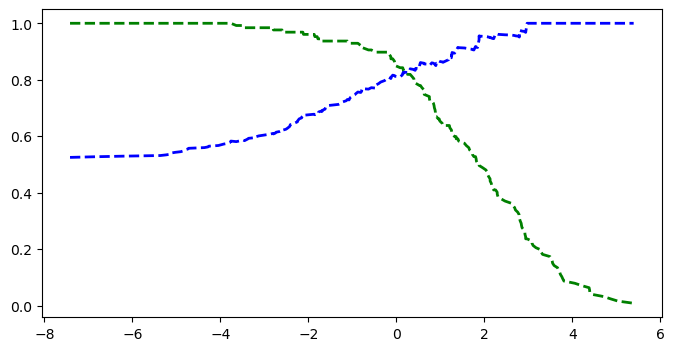

In [38]:
from sklearn.calibration import cross_val_predict
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(logistic_regression, x_train, y_train, cv=3,
                             method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g--", label="Recall", linewidth=2)

Text(0, 0.5, 'Precision')

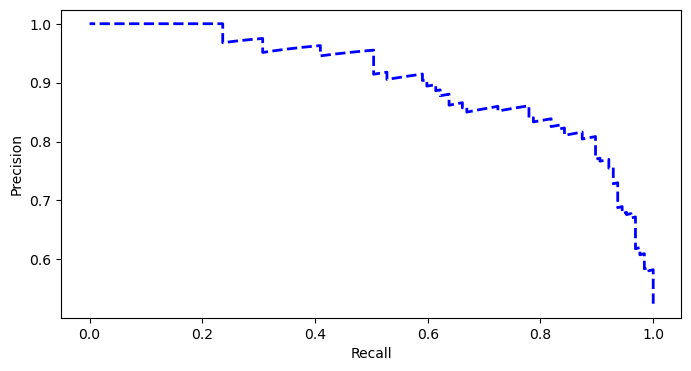

In [39]:
plt.figure(figsize=(8,4))
plt.plot(recalls, precisions, "b--", label="Precision/recall", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score



p = logistic_regression.predict(x_test)
print("PREDICCIONES: ",p)
y_reales = y_test
print("R2 SCORE:",r2_score(y_test, y_predict))

model_score = cross_val_score(logistic_regression, x_train, y_train, scoring = "neg_mean_squared_error", cv=3)
root_lin_score = np.sqrt(-model_score)
predicciones=logistic_regression.predict(x_test)

mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicciones)

print(f"MEDIA DE ERROR AL CUADRADO: {mse} -- ERROR ABSOLUTO: {mae}")
print("MEDIA AL CUADRADO:",root_lin_score.mean())
print("ABSOLUTO AL CUADRADO:",root_lin_score.std())
print("CROSS SCORE",root_lin_score)
print("Reales: ", list(y_reales))

PREDICCIONES:  [0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1
 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1]
R2 SCORE: 0.37185354691075523
MEDIA DE ERROR AL CUADRADO: 0.3621429841700741 -- ERROR ABSOLUTO: 0.13114754098360656
MEDIA AL CUADRADO: 0.42648381080089415
ABSOLUTO AL CUADRADO: 0.06615883329920973
CROSS SCORE [0.35136418 0.41573971 0.51234754]
Reales:  [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1]
